In [ ]:
#dataframes:
#merged_np_df
#cleaned_all_park_df
#cleaned_yearly_df
#top_np_df

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
np_income = pd.read_csv("Resources/np_income.csv")
np_income

,Park Unit,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
0,Abraham Lincoln Birthplace NHP,"265,707","$17,545,000",266,"$25,544,000"
1,Acadia NP,"3,970,260","$478,821,000","6,695","$690,712,000"
2,Adams NHP,"12,848","$849,000",11,"$1,290,000"
3,African Burial Ground NM,"29,743","$1,964,000",21,"$2,884,000"
4,Agate Fossil Beds NM,"16,357","$1,378,000",18,"$1,477,000"
...,...,...,...,...,...
387,Wupatki NM,"194,448","$14,153,000",170,"$16,660,000"
388,Yellowstone NP,"3,290,242","$452,025,000","6,234","$599,600,000"
389,Yosemite NP,"3,667,550","$497,552,000","6,314","$683,739,000"
390,Yukon - Charley Rivers NPRES,744,"$1,074,000",15,"$1,621,000"


In [4]:
np_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Park Unit                       392 non-null    object
 1   Total Recreation Visits         392 non-null    object
 2   Total Visitor Spending ($2022)  392 non-null    object
 3   Jobs                            392 non-null    object
 4   Economic Output ($2022)         392 non-null    object
dtypes: object(5)
memory usage: 15.4+ KB


In [5]:
np_income.columns

Index(['Park Unit', 'Total Recreation Visits',
       'Total Visitor Spending ($2022)', 'Jobs', 'Economic Output ($2022)'],
      dtype='object')

In [6]:
msk_np = np_income['Park Unit'].str.contains('NP')
msk2_np = np_income['Park Unit'].str.contains('National Park')
clean_np_income = np_income.loc[msk_np | msk2_np]

msk3_np = clean_np_income['Park Unit'].str.contains('NPRES')

np_df = clean_np_income.loc[~msk3_np].copy()
np_df

,Park Unit,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
1,Acadia NP,"3,970,260","$478,821,000","6,695","$690,712,000"
15,Arches NP,"1,460,652","$274,172,000","3,558","$335,174,000"
20,Badlands NP,"1,006,809","$73,746,000",991,"$95,334,000"
25,Big Bend NP,"514,107","$48,061,000",655,"$55,676,000"
31,Biscayne NP,"701,023","$50,949,000",659,"$74,118,000"
...,...,...,...,...,...
381,Wolf Trap National Park for the Performing Arts,"445,497","$29,417,000",365,"$43,803,000"
385,Wrangell - St Elias NP&PRES,"65,236","$107,689,000","1,510","$161,154,000"
388,Yellowstone NP,"3,290,242","$452,025,000","6,234","$599,600,000"
389,Yosemite NP,"3,667,550","$497,552,000","6,314","$683,739,000"


In [7]:
np_location = pd.read_csv('Resources/np_location.csv')
np_location

,Unnamed: 0,National Park,Latitude,Longitude,Activity Amount
0,0,Acadia National Park,44.409286,-68.247501,46.0
1,1,Arches National Park,38.722618,-109.586367,18.0
2,2,Badlands National Park,43.685848,-102.482942,21.0
3,3,Big Bend National Park,29.298178,-103.229790,25.0
4,4,Biscayne National Park,25.490587,-80.210239,24.0
...,...,...,...,...,...
58,58,Wolf Trap National Park for the Performing Arts,38.938545,-77.265089,8.0
59,59,Wrangell - St Elias National Park & Preserve,61.418215,-142.602844,46.0
60,60,Yellowstone National Park,44.598244,-110.547169,53.0
61,61,Yosemite National Park,37.848833,-119.557187,33.0


In [8]:
clean_nplocation = np_location.drop(columns='Unnamed: 0')
clean_nplocation

,National Park,Latitude,Longitude,Activity Amount
0,Acadia National Park,44.409286,-68.247501,46.0
1,Arches National Park,38.722618,-109.586367,18.0
2,Badlands National Park,43.685848,-102.482942,21.0
3,Big Bend National Park,29.298178,-103.229790,25.0
4,Biscayne National Park,25.490587,-80.210239,24.0
...,...,...,...,...
58,Wolf Trap National Park for the Performing Arts,38.938545,-77.265089,8.0
59,Wrangell - St Elias National Park & Preserve,61.418215,-142.602844,46.0
60,Yellowstone National Park,44.598244,-110.547169,53.0
61,Yosemite National Park,37.848833,-119.557187,33.0


In [9]:
np_df['Park Unit'] = np_df['Park Unit'].str.replace('NP', 'National Park', case=False)
np_df['Park Unit'] = np_df['Park Unit'].str.replace('&PRES', ' & Preserve', case=False)
np_df['Park Unit'] = np_df['Park Unit'].str.replace('\xa0', " ", case=False)

np_df

,Park Unit,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
1,Acadia National Park,"3,970,260","$478,821,000","6,695","$690,712,000"
15,Arches National Park,"1,460,652","$274,172,000","3,558","$335,174,000"
20,Badlands National Park,"1,006,809","$73,746,000",991,"$95,334,000"
25,Big Bend National Park,"514,107","$48,061,000",655,"$55,676,000"
31,Biscayne National Park,"701,023","$50,949,000",659,"$74,118,000"
...,...,...,...,...,...
381,Wolf Trap National Park for the Performing Arts,"445,497","$29,417,000",365,"$43,803,000"
385,Wrangell - St Elias National Park & Preserve,"65,236","$107,689,000","1,510","$161,154,000"
388,Yellowstone National Park,"3,290,242","$452,025,000","6,234","$599,600,000"
389,Yosemite National Park,"3,667,550","$497,552,000","6,314","$683,739,000"


In [10]:
renamed_np_df = np_df.rename(columns={'Park Unit': 'National Park'})
renamed_np_df

,National Park,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
1,Acadia National Park,"3,970,260","$478,821,000","6,695","$690,712,000"
15,Arches National Park,"1,460,652","$274,172,000","3,558","$335,174,000"
20,Badlands National Park,"1,006,809","$73,746,000",991,"$95,334,000"
25,Big Bend National Park,"514,107","$48,061,000",655,"$55,676,000"
31,Biscayne National Park,"701,023","$50,949,000",659,"$74,118,000"
...,...,...,...,...,...
381,Wolf Trap National Park for the Performing Arts,"445,497","$29,417,000",365,"$43,803,000"
385,Wrangell - St Elias National Park & Preserve,"65,236","$107,689,000","1,510","$161,154,000"
388,Yellowstone National Park,"3,290,242","$452,025,000","6,234","$599,600,000"
389,Yosemite National Park,"3,667,550","$497,552,000","6,314","$683,739,000"


In [11]:
clean_nplocation.loc[59, "National Park"]

'Wrangell - St Elias National Park & Preserve'

In [12]:
renamed_np_df.loc[385,'National Park']

'Wrangell - St Elias National Park & Preserve'

In [13]:
merged_np_df = pd.merge(clean_nplocation,renamed_np_df, how='left', on='National Park')
merged_np_df

,National Park,Latitude,Longitude,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
0,Acadia National Park,44.409286,-68.247501,46.0,"3,970,260","$478,821,000","6,695","$690,712,000"
1,Arches National Park,38.722618,-109.586367,18.0,"1,460,652","$274,172,000","3,558","$335,174,000"
2,Badlands National Park,43.685848,-102.482942,21.0,"1,006,809","$73,746,000",991,"$95,334,000"
3,Big Bend National Park,29.298178,-103.229790,25.0,"514,107","$48,061,000",655,"$55,676,000"
4,Biscayne National Park,25.490587,-80.210239,24.0,"701,023","$50,949,000",659,"$74,118,000"
...,...,...,...,...,...,...,...,...
58,Wolf Trap National Park for the Performing Arts,38.938545,-77.265089,8.0,"445,497","$29,417,000",365,"$43,803,000"
59,Wrangell - St Elias National Park & Preserve,61.418215,-142.602844,46.0,"65,236","$107,689,000","1,510","$161,154,000"
60,Yellowstone National Park,44.598244,-110.547169,53.0,"3,290,242","$452,025,000","6,234","$599,600,000"
61,Yosemite National Park,37.848833,-119.557187,33.0,"3,667,550","$497,552,000","6,314","$683,739,000"


In [14]:
merged_np_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   National Park                   63 non-null     object 
 1   Latitude                        63 non-null     float64
 2   Longitude                       63 non-null     float64
 3   Activity Amount                 63 non-null     float64
 4   Total Recreation Visits         56 non-null     object 
 5   Total Visitor Spending ($2022)  56 non-null     object 
 6   Jobs                            56 non-null     object 
 7   Economic Output ($2022)         56 non-null     object 
dtypes: float64(3), object(5)
memory usage: 4.1+ KB


In [15]:
merged_np_df['Total Visitor Spending ($2022)'] = merged_np_df['Total Visitor Spending ($2022)'].str.replace('\xa0', "", case=False)
merged_np_df['Economic Output ($2022)'] = merged_np_df['Economic Output ($2022)'].str.replace('\xa0', "", case=False)
merged_np_df['Jobs'] = merged_np_df['Jobs'].str.replace('\xa0', "", case=False)

In [16]:
merged_np_df.loc[0, 'Total Visitor Spending ($2022)']

'$478,821,000'

In [17]:
merged_np_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   National Park                   63 non-null     object 
 1   Latitude                        63 non-null     float64
 2   Longitude                       63 non-null     float64
 3   Activity Amount                 63 non-null     float64
 4   Total Recreation Visits         56 non-null     object 
 5   Total Visitor Spending ($2022)  56 non-null     object 
 6   Jobs                            56 non-null     object 
 7   Economic Output ($2022)         56 non-null     object 
dtypes: float64(3), object(5)
memory usage: 4.1+ KB


In [18]:
merged_np_df['Total Recreation Visits'] = merged_np_df['Total Recreation Visits'].str.replace(",","").astype(float)
merged_np_df['Total Visitor Spending ($2022)'] = merged_np_df['Total Visitor Spending ($2022)'].str.replace(",","")
merged_np_df['Total Visitor Spending ($2022)'] = merged_np_df['Total Visitor Spending ($2022)'].str.replace("$", "").astype(float)
merged_np_df['Jobs'] = merged_np_df['Jobs'].str.replace(",","").astype(float)
merged_np_df['Economic Output ($2022)'] = merged_np_df['Economic Output ($2022)'].str.replace(",","")
merged_np_df['Economic Output ($2022)'] = merged_np_df['Economic Output ($2022)'].str.replace("$","").astype(float)

In [19]:
merged_np_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   National Park                   63 non-null     object 
 1   Latitude                        63 non-null     float64
 2   Longitude                       63 non-null     float64
 3   Activity Amount                 63 non-null     float64
 4   Total Recreation Visits         56 non-null     float64
 5   Total Visitor Spending ($2022)  56 non-null     float64
 6   Jobs                            56 non-null     float64
 7   Economic Output ($2022)         56 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.1+ KB


In [20]:
merged_np_df.head()

,National Park,Latitude,Longitude,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
0,Acadia National Park,44.409286,-68.247501,46.0,3970260.0,478821000.0,6695.0,690712000.0
1,Arches National Park,38.722618,-109.586367,18.0,1460652.0,274172000.0,3558.0,335174000.0
2,Badlands National Park,43.685848,-102.482942,21.0,1006809.0,73746000.0,991.0,95334000.0
3,Big Bend National Park,29.298178,-103.229790,25.0,514107.0,48061000.0,655.0,55676000.0
4,Biscayne National Park,25.490587,-80.210239,24.0,701023.0,50949000.0,659.0,74118000.0


In [21]:
np_hvplot = merged_np_df.hvplot.points('Longitude',
                                'Latitude',
                                geo=True,
                                tiles='OSM',
                                color='National Park',
                                size=merged_np_df['Total Recreation Visits'].div(100000),
                                scale=1,
                                alpha=0.5,
                                frame_width=700,
                                frame_height=500,
                                title="National Parks by Visitation (2022)",
                                hover_cols=['Activity Amount',
                                            'Total Recreation Visits',
                                            'Total Visitor Spending ($2022)',
                                            'Jobs',
                                            'Economic Output ($2022)'],)
np_hvplot

/Users/ashleynguyen/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (National Park,_size,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022))

In [22]:
hvplot.show(np_hvplot)
hvplot.save(np_hvplot, 'output/np_hvplot.html')

Launching server at http://localhost:62993


In [23]:
all_parks = pd.read_csv('Resources/all_park_location.csv')
all_parks

,Unnamed: 0,National Park,Latitude,Longitude,Activity Amount
0,0,Abraham Lincoln Birthplace National Historical...,37.585866,-85.673305,15
1,1,Acadia National Park,44.409286,-68.247501,46
2,2,Adams National Historical Park,42.255396,-71.011604,6
3,3,African Burial Ground National Monument,40.714527,-74.004474,7
4,4,Agate Fossil Beds National Monument,42.421704,-103.753886,16
...,...,...,...,...,...
447,447,Yorktown Battlefield Part of Colonial National...,37.219500,-76.498300,21
448,448,Yosemite National Park,37.848833,-119.557187,33
449,449,Yucca House National Monument,37.247789,-108.686127,2
450,450,Yukon - Charley Rivers National Preserve,65.093561,-142.796002,21


In [24]:
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NP', 'National Park', case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('&PRES', ' & Preserve', case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('\xa0', " ", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NHP', "National Historial Park", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NM', "National Monument", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('WR', "Wild River", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NHS', "National Historic Site", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NRA', "National Recreation Area", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NB', "National Battlefield", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NL', "National Lakeshore", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NMEM', "National Memorial", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NS', "National Seashore", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('Nb', "National Battlefield", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('PKWY', "Parkway", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NSR', "National Scenic River", case=False)
np_income['Park Unit'] = np_income['Park Unit'].str.replace('NR', "National River", case=False)

In [25]:
renamed_all_income = np_income.rename(columns={'Park Unit': 'National Park'})

In [26]:
renamed_all_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   National Park                   392 non-null    object
 1   Total Recreation Visits         392 non-null    object
 2   Total Visitor Spending ($2022)  392 non-null    object
 3   Jobs                            392 non-null    object
 4   Economic Output ($2022)         392 non-null    object
dtypes: object(5)
memory usage: 15.4+ KB


In [27]:
renamed_all_income['Total Recreation Visits'] = renamed_all_income['Total Recreation Visits'].str.replace(",","").astype(float)
renamed_all_income['Total Visitor Spending ($2022)'] = renamed_all_income['Total Visitor Spending ($2022)'].str.replace(",","")
renamed_all_income['Total Visitor Spending ($2022)'] = renamed_all_income['Total Visitor Spending ($2022)'].str.replace("$", "").astype(float)
renamed_all_income['Jobs'] = renamed_all_income['Jobs'].str.replace(",","").astype(float)
renamed_all_income['Economic Output ($2022)'] = renamed_all_income['Economic Output ($2022)'].str.replace(",","")
renamed_all_income['Economic Output ($2022)'] = renamed_all_income['Economic Output ($2022)'].str.replace("$","").astype(float)

In [28]:
full_np_df = pd.merge(all_parks,renamed_all_income, how='left', on='National Park')
dropna_all_park_df=full_np_df.dropna()
cleaned_all_park_df=dropna_all_park_df.drop(columns='Unnamed: 0')
cleaned_all_park_df

,National Park,Latitude,Longitude,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
1,Acadia National Park,44.409286,-68.247501,46,3970260.0,478821000.0,6695.0,690712000.0
3,African Burial Ground National Monument,40.714527,-74.004474,7,29743.0,1964000.0,21.0,2884000.0
4,Agate Fossil Beds National Monument,42.421704,-103.753886,16,16357.0,1378000.0,18.0,1477000.0
6,Alagnak Wild River,59.051802,-156.112002,12,184.0,7000.0,0.0,8000.0
9,Alibates Flint Quarries National Monument,35.581966,-101.671701,7,7520.0,497000.0,7.0,638000.0
...,...,...,...,...,...,...,...,...
440,Wolf Trap National Park for the Performing Arts,38.938545,-77.265089,8,445497.0,29417000.0,365.0,43803000.0
445,Wupatki National Monument,35.557411,-111.395722,19,194448.0,14153000.0,170.0,16660000.0
446,Yellowstone National Park,44.598244,-110.547169,53,3290242.0,452025000.0,6234.0,599600000.0
448,Yosemite National Park,37.848833,-119.557187,33,3667550.0,497552000.0,6314.0,683739000.0


In [37]:
all_parks_hvplot = cleaned_all_park_df.hvplot.points('Longitude',
                                                     'Latitude',
                                                     geo=True,
                                                     tiles='OSM',
                                                     color='National Park',
                                                     size=cleaned_all_park_df['Total Recreation Visits'].div(100000),
                                                     scale=1,
                                                     alpha=0.5,
                                                     frame_width=700,
                                                     frame_height=500,
                                                     title="National Parksites by Visitation (2022)",
                                                     hover_cols=['Activity Amount',
                                                                 'Total Recreation Visits',
                                                                 'Total Visitor Spending ($2022)',
                                                                 'Jobs',
                                                                 'Economic Output ($2022)'],)
all_parks_hvplot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (National Park,_size,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022))

In [59]:
hvplot.show(all_parks_hvplot)
# hvplot.save(all_parks_hvplot, 'output/allparks_hvplot.html')

Launching server at http://localhost:63046


In [39]:
yearly_income = pd.read_csv("Resources/yearlyincome.csv")
yearly_income

,Unnamed: 0,Visitor Spending,Jobs Supported,Local Jobs,Total Output,Unnamed: 5
0,Visitation,NaN,NaN,NaN,NaN,NaN
1,2013,"273,630,895",$14.6 billion,"237,599","197,343",$26.5 billion
2,2014,"292,800,082",$15.7 billion,"276,960","235,600",$29.7 billion
3,2015,"307,247,252",$16.9 billion,"295,339","252,030",$32 billion
4,2016,"330,971,689",$18.4 billion,"318,000","271,544",$34.9 billion
5,2017,"330,882,751",$18.2 billion,"306,000","255,900",$35.8 billion
6,2018,"318,211,833",$20.2 billion,"329,000","268,195",$40.1 billion
7,2019,"327,516,619",$21.0 billion,"340,500","278,173",$41.7 billion
8,2020,"237,064,332",$14.5 billion,"234,000","194,400",$28.6 billion
9,2021,"297,115,406",$20.5 billion,"322,600","268,900",$42.5 billion


In [40]:
new_yearly=yearly_income.dropna()
new_yearly.columns

Index(['Unnamed: 0', 'Visitor Spending', 'Jobs Supported', 'Local Jobs',
       'Total Output', 'Unnamed: 5'],
      dtype='object')

In [41]:
cleaned_yearly_df = new_yearly.rename(columns={"Unnamed: 0": "Year",
                                        "Visitor Spending": "Visitation",
                                        "Jobs Supported": "Visitor Spending (Billions)",
                                        "Local Jobs": "Jobs Supported",
                                        "Total Output": "Local Jobs",
                                        "Unnamed: 5": "Total Output (Billions)"})
cleaned_yearly_df

,Year,Visitation,Visitor Spending (Billions),Jobs Supported,Local Jobs,Total Output (Billions)
1,2013,"273,630,895",$14.6 billion,"237,599","197,343",$26.5 billion
2,2014,"292,800,082",$15.7 billion,"276,960","235,600",$29.7 billion
3,2015,"307,247,252",$16.9 billion,"295,339","252,030",$32 billion
4,2016,"330,971,689",$18.4 billion,"318,000","271,544",$34.9 billion
5,2017,"330,882,751",$18.2 billion,"306,000","255,900",$35.8 billion
6,2018,"318,211,833",$20.2 billion,"329,000","268,195",$40.1 billion
7,2019,"327,516,619",$21.0 billion,"340,500","278,173",$41.7 billion
8,2020,"237,064,332",$14.5 billion,"234,000","194,400",$28.6 billion
9,2021,"297,115,406",$20.5 billion,"322,600","268,900",$42.5 billion
10,2022,"311,985,998",$23.9 billion,"378,400","314,600",$50.3 billion


In [42]:
cleaned_yearly_df['Visitor Spending (Billions)'] = cleaned_yearly_df['Visitor Spending (Billions)'].str.replace('\xa0', "", case=False)
cleaned_yearly_df['Year'] = cleaned_yearly_df['Year'].str.replace('\xa0', "", case=False)

In [43]:
cleaned_yearly_df.loc[2, 'Year']

'2014'

In [44]:
cleaned_yearly_df['Visitation'] = cleaned_yearly_df['Visitation'].str.replace(",","").astype(int)
cleaned_yearly_df['Visitor Spending (Billions)'] = cleaned_yearly_df['Visitor Spending (Billions)'].str.replace("$","")
cleaned_yearly_df['Visitor Spending (Billions)'] = cleaned_yearly_df['Visitor Spending (Billions)'].str.replace(" billion","").astype(float)
cleaned_yearly_df['Jobs Supported'] = cleaned_yearly_df['Jobs Supported'].str.replace(",","").astype(float)
cleaned_yearly_df['Local Jobs'] = cleaned_yearly_df['Local Jobs'].str.replace(",","").astype(float)
cleaned_yearly_df['Total Output (Billions)'] = cleaned_yearly_df['Total Output (Billions)'].str.replace("$","")
cleaned_yearly_df['Total Output (Billions)'] = cleaned_yearly_df['Total Output (Billions)'].str.replace(" billion","").astype(float)

cleaned_yearly_df['Year'] = cleaned_yearly_df['Year'].astype(int)

In [45]:
cleaned_yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10 non-null     int64  
 1   Visitation                   10 non-null     int64  
 2   Visitor Spending (Billions)  10 non-null     float64
 3   Jobs Supported               10 non-null     float64
 4   Local Jobs                   10 non-null     float64
 5   Total Output (Billions)      10 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 860.0 bytes


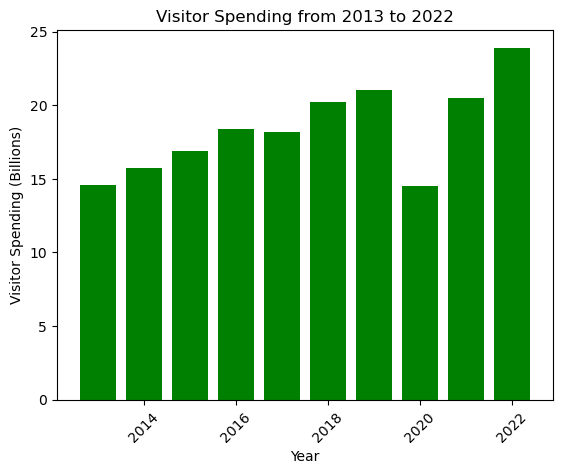

In [46]:
x_value = cleaned_yearly_df['Year']
y_value = cleaned_yearly_df['Visitor Spending (Billions)']

plt.bar(x_value, y_value, color='green', alpha=1, align='center')
plt.title('Visitor Spending from 2013 to 2022')
plt.xlabel('Year')
plt.ylabel('Visitor Spending (Billions)')
plt.xticks(rotation=45)
plt.show()

In [47]:
def linear_regression():
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_value,regress_values,"-r")
    plt.annotate(line_eq,(x,y),fontsize=18, color='red')
    print(f'The r-value is: {rvalue}')

The r-value is: 0.6917765641285837


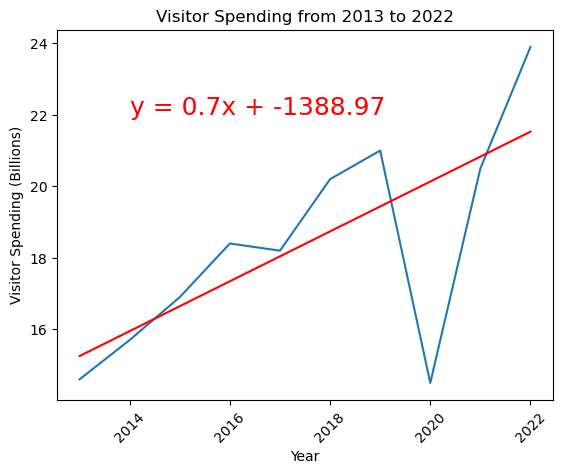

In [48]:
x_value = cleaned_yearly_df['Year']
y_value = cleaned_yearly_df['Visitor Spending (Billions)']

x = 2014
y = 22

plt.plot(x_value,y_value)

linear_regression()

plt.xlabel('Year')
plt.title('Visitor Spending from 2013 to 2022')
plt.xlabel('Year')
plt.ylabel('Visitor Spending (Billions)')
plt.xticks(rotation=45)
plt.show()

In [49]:
smoky = merged_np_df.loc[merged_np_df['National Park'] == 'Great Smoky Mountains National Park']
gc = merged_np_df.loc[merged_np_df['National Park'] == 'Grand Canyon National Park']
zion = merged_np_df.loc[merged_np_df['National Park'] == 'Zion National Park']
rm = merged_np_df.loc[merged_np_df['National Park'] == 'Rocky Mountain National Park']
acadia = merged_np_df.loc[merged_np_df['National Park'] == 'Acadia National Park']
yose = merged_np_df.loc[merged_np_df['National Park'] == 'Yosemite National Park']

top_np_df = pd.concat([smoky, gc, zion, rm, acadia, yose], ignore_index=True)
top_np_df

,National Park,Latitude,Longitude,Activity Amount,Total Recreation Visits,Total Visitor Spending ($2022),Jobs,Economic Output ($2022)
0,Great Smoky Mountains National Park,35.601164,-83.508183,36.0,12937633.0,2.110462e+09,32590.0,3.262390e+09
1,Grand Canyon National Park,36.000117,-112.121516,32.0,4732101.0,7.588990e+08,9991.0,1.010477e+09
2,Zion National Park,37.298393,-113.026514,22.0,4692417.0,6.724270e+08,10777.0,9.612700e+08
3,Rocky Mountain National Park,40.355692,-105.697288,19.0,4300424.0,5.837940e+08,8082.0,9.118940e+08
4,Acadia National Park,44.409286,-68.247501,46.0,3970260.0,4.788210e+08,6695.0,6.907120e+08
5,Yosemite National Park,37.848833,-119.557187,33.0,3667550.0,4.975520e+08,6314.0,6.837390e+08


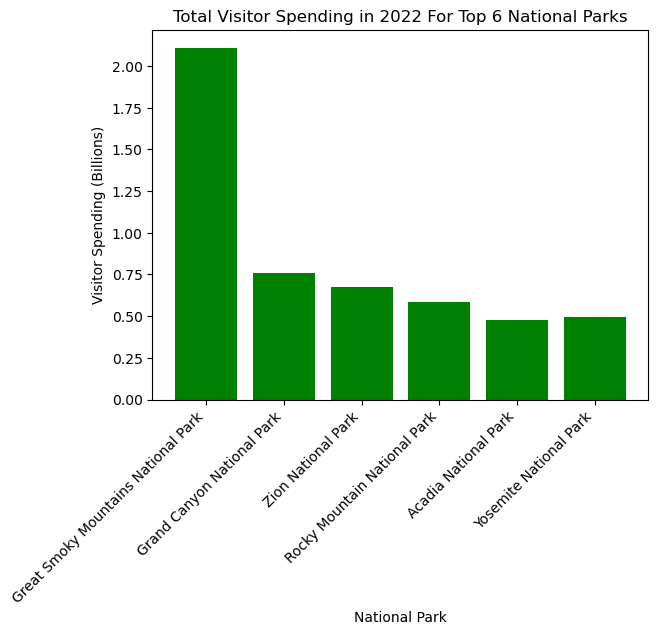

In [50]:
x_value = top_np_df['National Park']
y_value = top_np_df['Total Visitor Spending ($2022)'].div(1000000000)

plt.bar(x_value, y_value, color='green', alpha=1, align='center')
plt.title('Total Visitor Spending in 2022 For Top 6 National Parks')
plt.xlabel('National Park')
plt.ylabel('Visitor Spending (Billions)')
plt.xticks(rotation=45, ha='right')
plt.show()

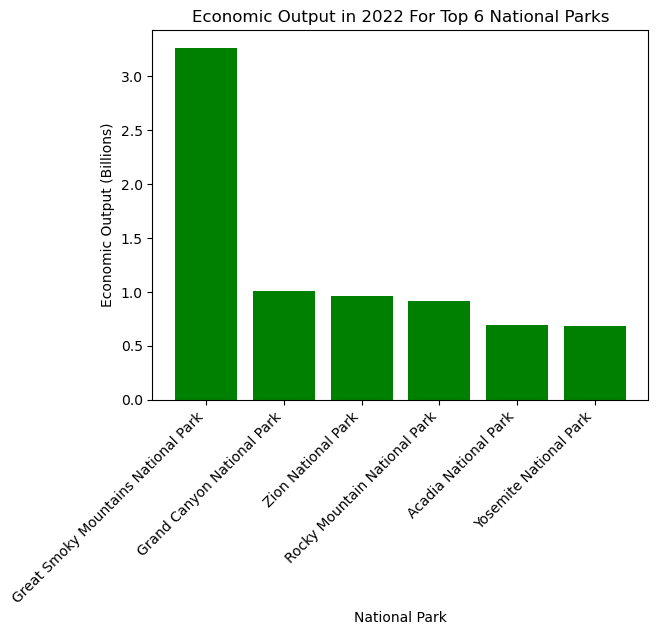

In [51]:
x_value = top_np_df['National Park']
y_value = top_np_df['Economic Output ($2022)'].div(1000000000)

plt.bar(x_value, y_value, color='green', alpha=1, align='center')
plt.title('Economic Output in 2022 For Top 6 National Parks')
plt.xlabel('National Park')
plt.ylabel('Economic Output (Billions)')
plt.xticks(rotation=45, ha='right')
plt.show()

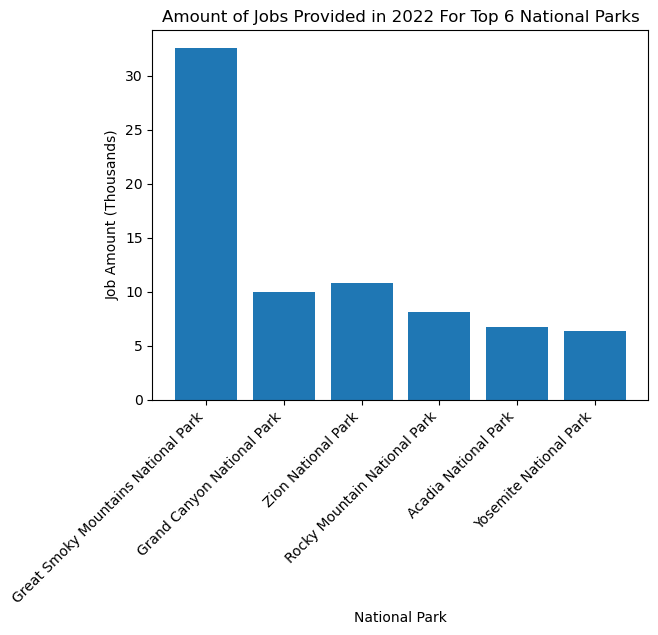

In [57]:
x_value = top_np_df['National Park']
y_value = top_np_df['Jobs'].div(1000)

plt.bar(x_value, y_value, alpha=1, align='center')
plt.title('Amount of Jobs Provided in 2022 For Top 6 National Parks')
plt.xlabel('National Park')
plt.ylabel('Job Amount (Thousands)')
plt.xticks(rotation=45, ha='right')
plt.show()

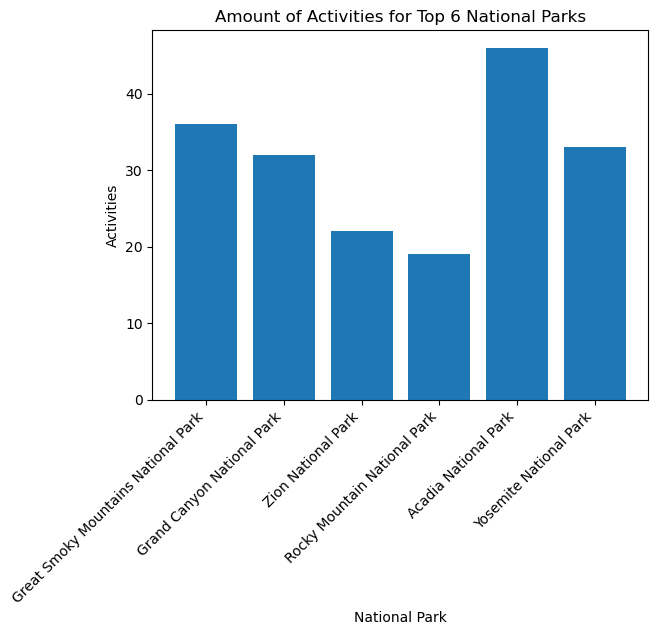

In [58]:
x_value = top_np_df['National Park']
y_value = top_np_df['Activity Amount']

plt.bar(x_value, y_value, alpha=1, align='center')
plt.title('Amount of Activities for Top 6 National Parks')
plt.xlabel('National Park')
plt.ylabel('Activities')
plt.xticks(rotation=45, ha='right')
plt.show()